<a href="https://colab.research.google.com/github/prav-kotte1/DM-Lab/blob/main/ModelEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    RocCurveDisplay
)

In [ ]:
data = load_wine()
X = data.data
y = data.target

X = X[y != 2]
y = y[y != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)

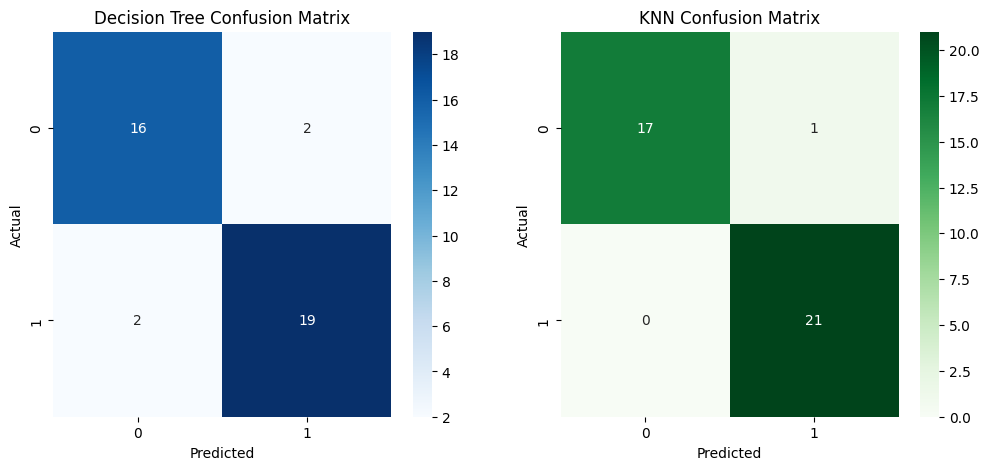

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("KNN Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

In [ ]:
def print_metrics(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print()

print_metrics("Decision Tree", y_test, y_pred_dt)
print_metrics("KNN", y_test, y_pred_knn)

--- Decision Tree ---
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.9047619047619048

--- KNN ---
Precision: 0.9545454545454546
Recall: 1.0
F1 Score: 0.9767441860465116



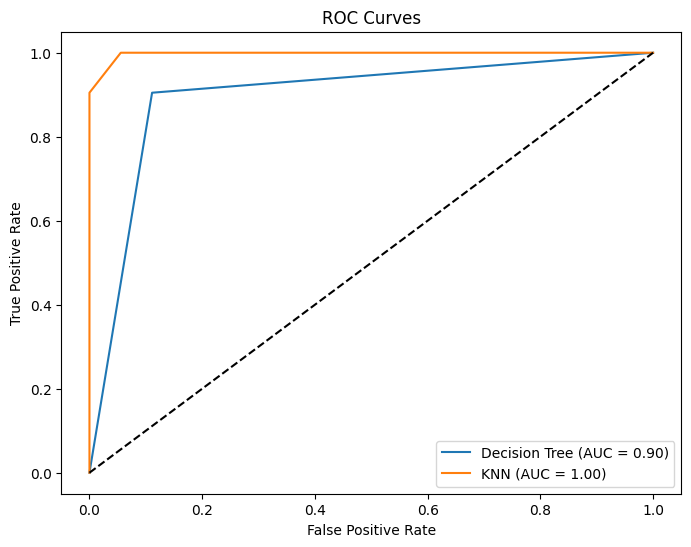

In [ ]:
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Decision Tree AUC:", roc_auc_dt)
print("KNN AUC:", roc_auc_knn)

Decision Tree AUC: 0.8968253968253967
KNN AUC: 0.9973544973544973
